In [35]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas import DataFrame
import seaborn as sns
import os

library(tidyverse)
library(hrbrthemes)
library(viridis)
library(gridExtra)
library(ggrepel)
library(plotly)


In [36]:
songdata_df = DataFrame(pd.read_csv("song_data.csv", index_col = 0))
songinfo_df = DataFrame(pd.read_csv("song_info.csv", index_col = 0))

In [37]:
songdata_df.head()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
song_name,,,,,,,,,,,,,,
Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [38]:
songinfo_df.head()

,artist_name,album_names,playlist
song_name,,,
Boulevard of Broken Dreams,Green Day,Greatest Hits: God's Favorite Band,00s Rock Anthems
In The End,Linkin Park,Hybrid Theory,00s Rock Anthems
Seven Nation Army,The White Stripes,Elephant,00s Rock Anthems
By The Way,Red Hot Chili Peppers,By The Way (Deluxe Version),00s Rock Anthems
How You Remind Me,Nickelback,Silver Side Up,00s Rock Anthems


In [39]:
songs_df = pd.concat([songdata_df, songinfo_df], axis=1)

In [40]:
songs_df.head()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,artist_name,album_names,playlist
song_name,,,,,,,,,,,,,,,,,
Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474,Green Day,Greatest Hits: God's Favorite Band,00s Rock Anthems
In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370,Linkin Park,Hybrid Theory,00s Rock Anthems
Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324,The White Stripes,Elephant,00s Rock Anthems
By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198,Red Hot Chili Peppers,By The Way (Deluxe Version),00s Rock Anthems
How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574,Nickelback,Silver Side Up,00s Rock Anthems


**Song Popularity**

The popularity of an artist's track relative to the rest of their discography. The value will be between 0 and 100, with 100 being the most popular.
The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are.

**Song Duration (ms)**

Contains data on the length of time the song is in milliseconds

**Acousticness**

A measurement from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents highest confidence the track is acoustic.

**Danceability**

Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of type float is returned between 0.0 and 1.0, where 0.0 is least danceable and 1.0 is most danceable.

**Energy**

Energy is a measure of type float that is between 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Energetic tracks can be described as fast, loud, and noisy. For example, death metal has high energy, while a slow jazz would register low on the scale.

**Instrumentalness**

Predicts whether a track contains no vocals by returning a value of type float that is between 0.0 and 1.0. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

**Liveness**

Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.


**Loudness**

The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db

**Audio Mode**

Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

**Speechiness**

Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
    
**Tempo**

The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

**Time Signature**

An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

**Key Signature**

Key signature is represented on a scale, where integers are mapped to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. 

**Audio Valence**

A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

**Artist Name**

Artist that wrote the song

**ALbum Names**
Album that the song was released on

**Playlist**
Playlist that song originates from. **Note: Some songs may be part of multiple playlists**

In [41]:
songs_df.columns.values

array(['song_popularity', 'song_duration_ms', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature',
       'audio_valence', 'artist_name', 'album_names', 'playlist'],
      dtype=object)

In [42]:
playlist_sizes = DataFrame(songs_df.playlist.value_counts())

In [43]:
for i in playlist_sizes.index:
    print(i)

One-Hit Wonders
Your Favorite Coffeehouse
The Realest Down South
Country's Greatest Hits_  The '70's
Persian Essentials
The GRAMMYs Official Playlist
Piano in the Background
Lush Lofi
Chill Instrumental Beats
I Love My '90s Hip-Hop
You & Me
Alternative 10s
Nike Running Tempo Mix
NTC_ High Intensity Training Tracks
Get Turnt
Bedroom Pop
Young & Free
Indie Workout
Country's Greatest Hits_  The '60s
Cali Fire
Mellow Bars
90s Pop Rock Essentials
Infinite Acoustic
NTC_ Gym Strong
Rockin' Vibes
Soak Up the Sun
It's ALT Good!
New Music Friday
All Out 90s
All Out 00s
Have a Great Day!
All Out 80s
70s Rock Anthems
Happy Folk
Low-Key
Guilty Pleasures
Workday_ Pop
Alternative 80s
Feelin' Good
Contemporary Blend
NTC_ Studio Sounds
60s Rock Anthems
Off the Strength
Feel-Good Indie Rock
80s Hard Rock
Most Necessary
Retro Pop
Country's Greatest Hits_  The '90s
Country's Greatest Hits_  The '80s
Acoustic Hits
Alternative 90s
Acoustic Covers
80s Rock Anthems
Soft Pop Hits
Signed XOXO
Country's Greatest

Above we've counted how many playlists there are within our data. From first glancing at the available playlist names, it seems pretty straightforward that we can subset genres by the titles of the playlists. An example of this is below. We create a dataframe solely with playlists in the rock genre, and as we can see, we have a collection of rock music. We do this for other common genres.

In [44]:
#Create Rock data frame
rock_df = songs_df[songs_df['playlist'].str.contains("Rock")]

In [45]:
rock_df.playlist.value_counts()

Feel-Good Indie Rock       100
90s Pop Rock Essentials    100
Rockin' Vibes              100
80s Hard Rock              100
60s Rock Anthems           100
70s Rock Anthems           100
80s Rock Anthems           100
Rock Me UP!                 85
Hard Rock Workout           76
Punk Rock Workout           75
00s Rock Anthems            60
Rock Your Body              51
90s Rock Anthems            50
Rock This                   50
Corre con Rock              30
Name: playlist, dtype: int64

In [46]:
rock_df.shape

(1177, 17)

In [47]:
#Create Country DataFrame
country_df = songs_df[songs_df['playlist'].str.contains("Country")]
country_df["genres"]="Country"
country_df.shape

/Users/golnazabrishami/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(674, 18)

In [48]:
#Create pop dataframe
pop_df = songs_df[songs_df['playlist'].str.contains("Pop")]
pop_df["genres"]="Pop"



/Users/golnazabrishami/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [49]:
pop_df.shape

(1222, 18)

In [50]:
#Collect playlists from rap and hip hop
rap_df = songs_df[(songs_df['playlist'].str.contains("Rap")) | (songs_df['playlist'].str.contains("Hop")) ]
rap_df["genres"]="rap_df"

rap_df.shape

/Users/golnazabrishami/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(987, 18)

In [51]:
#Alternative
alt_df = songs_df[songs_df['playlist'].str.contains("Alternative")]
alt_df["genres"]="Alternative"

alt_df.shape

/Users/golnazabrishami/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(689, 18)

In [52]:
#Indie
indie_df = songs_df[songs_df['playlist'].str.contains("Indie")]
indie_df["genres"]="Indie"

indie_df.shape

/Users/golnazabrishami/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(357, 18)

In [53]:
#Latin music
latin_df = songs_df[(songs_df['playlist'].str.contains("Latin")) | 
                    (songs_df['playlist'].str.contains("Mex")) | 
                    (songs_df['playlist'].str.contains("Columbia")) | 
                    (songs_df['playlist'].str.contains("Puerto")) | 
                    (songs_df['playlist'].str.contains("Brazil")) | 
                    (songs_df['playlist'].str.contains("Salsa")) | 
                    (songs_df['playlist'].str.contains("Bachata")) | 
                    (songs_df['playlist'].str.contains("Regg")) | 
                    (songs_df['playlist'].str.contains("Chicano"))]
latin_df["genres"]="Latin"
latin_df.shape

/Users/golnazabrishami/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


(1094, 18)

In [66]:
#new_songs_df = pd.concat(latin_df,indie_df, keys=['latin_df', 'indie_df', 'alt_df','rap_df','pop_df','country_df'])
#dfs = [df0, df1, df2, dfN]
new_songs_df=pd.concat([latin_df, indie_df,alt_df,rap_df,pop_df,country_df])
new_songs_df.shape

(5023, 18)

In [105]:
new_songs_df

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,artist_name,album_names,playlist,genres
song_name,,,,,,,,,,,,,,,,,,
MIA (feat. Drake),94,210367,0.01430,0.818,0.540,0.000512,6,0.0990,-6.350,0,0.0544,97.064,4,0.174,Bad Bunny,MIA (feat. Drake),100% LatinX,Latin
"Taki Taki (with Selena Gomez, Ozuna & Cardi B)",98,212500,0.15300,0.841,0.798,0.000003,1,0.0618,-4.206,0,0.2290,95.948,4,0.591,DJ Snake,"Taki Taki (with Selena Gomez, Ozuna & Cardi B)",100% LatinX,Latin
White Boi,59,185282,0.09830,0.830,0.497,0.000000,1,0.0906,-6.940,1,0.0520,127.965,4,0.634,Dillon Francis,WUT WUT,100% LatinX,Latin
Just Wanna Love You (feat. J. Balvin),73,199230,0.05570,0.687,0.766,0.001070,11,0.1460,-6.080,1,0.0540,94.973,4,0.303,Cris Cab,Just Wanna Love You (feat. J. Balvin),100% LatinX,Latin
Beautiful (feat. Camila Cabello),94,180000,0.34600,0.638,0.717,0.000000,2,0.1050,-4.722,1,0.0337,100.027,4,0.249,Bazzi,Beautiful (feat. Camila Cabello),100% LatinX,Latin
Celoso,87,179693,0.35200,0.746,0.703,0.000000,4,0.3310,-4.179,0,0.1070,166.043,4,0.667,Lele Pons,Celoso,100% LatinX,Latin
Good Vibes,73,235720,0.03480,0.823,0.630,0.000007,7,0.0964,-3.932,1,0.0797,100.040,4,0.184,Fuego,Good Vibes,100% LatinX,Latin
Real Friends,85,223583,0.23500,0.701,0.512,0.000005,0,0.1350,-6.869,0,0.0969,91.947,4,0.663,Camila Cabello,Real Friends,100% LatinX,Latin
Pa La Calle,61,243487,0.11700,0.695,0.884,0.000000,0,0.1040,-6.279,1,0.1310,74.992,4,0.854,COASTCITY,Pa La Calle,100% LatinX,Latin


In [54]:
rock_mode = rock_df.audio_mode.value_counts()
country_mode = country_df.audio_mode.value_counts()
pop_mode = pop_df.audio_mode.value_counts()
alt_mode = alt_df.audio_mode.value_counts()
rap_mode = rap_df.audio_mode.value_counts()
latin_mode = latin_df.audio_mode.value_counts()
indie_mode = indie_df.audio_mode.value_counts()

In [55]:
rock_mode

1    827
0    350
Name: audio_mode, dtype: int64

In [56]:
minor = np.array([rock_mode[0], country_mode[0], pop_mode[0], alt_mode[0],rap_mode[0], latin_mode[0], indie_mode[0]])
minor

array([350,  46, 441, 174, 497, 506, 136])

In [57]:
major = np.array([rock_mode[1], country_mode[1], pop_mode[1], alt_mode[1],rap_mode[1], latin_mode[1], indie_mode[1]])
major

array([827, 628, 781, 515, 490, 588, 221])

In [58]:
total_modes = major + minor
total_modes

array([1177,  674, 1222,  689,  987, 1094,  357])

In [59]:
genres = ["rock", "country", "pop", "alternative", "rap", "latin", "indie"]

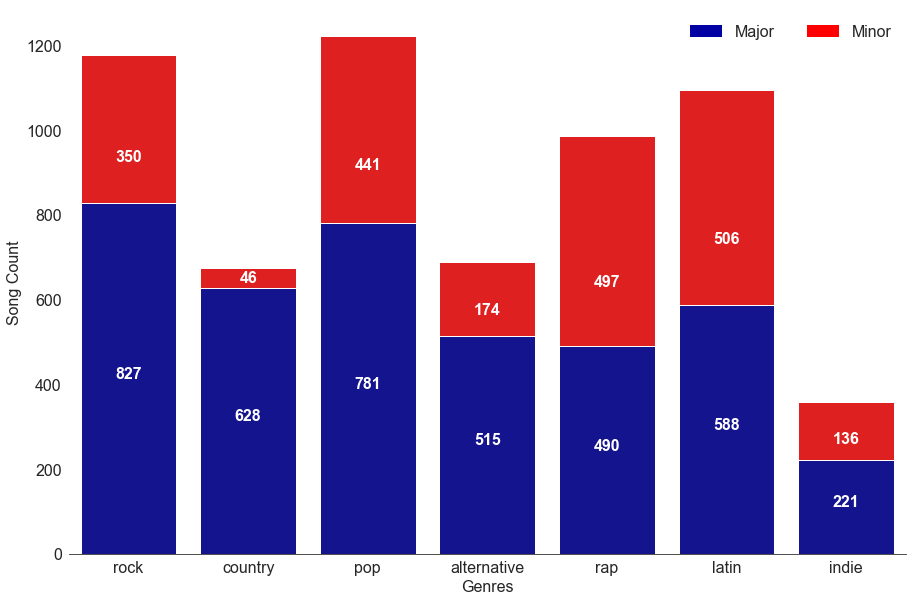

In [60]:
sns.set_style("white")
sns.set_context({"figure.figsize": (15, 10)})

#Plot 1 - background - "total" (top) series
ax1 = sns.barplot(x = genres, y = total_modes, color = "red")

#Plot 2 - overlay - "bottom" series
bottom_plot = sns.barplot(x = genres, y = major, color = "#0000A3")


topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['Major', 'Minor'], loc=1, ncol = 2, prop={'size':16})
l.draw_frame(False)

#Optional code - Make plot look nicer
sns.despine(left=True)
bottom_plot.set_ylabel("Song Count")
bottom_plot.set_xlabel("Genres")

#Set fonts to consistent 16pt size
for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
             bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
    item.set_fontsize(16)

X = np.array(range(0,7))
for i in X:
    ax1.text(i,major[i]/2, major[i], color='white', ha="center", fontsize = 16, weight = "bold")
    bottom_plot.text(i, major[i] + minor[i]/3.5, minor[i], color ="white", ha = "center", fontsize = 16, weight = "bold")

In [67]:
songdata_valence = pd.pivot_table(new_songs_df,values='audio_valence', 
                                           index='key', columns='time_signature', aggfunc=np.median)
songdata_valence

time_signature,0,1,3,4,5
key,,,,,
0,NaN,0.3720,0.444,0.6130,0.5720
1,NaN,0.4360,0.312,0.6240,0.3730
2,NaN,0.4880,0.398,0.6080,0.5270
3,NaN,0.1550,0.417,0.6240,0.7875
4,NaN,0.8870,0.432,0.6080,0.5610
5,NaN,NaN,0.285,0.6220,0.2424
6,NaN,0.0812,0.565,0.5870,0.6770
7,0.0,0.1700,0.398,0.6165,0.5550
8,NaN,NaN,0.353,0.5880,0.5110


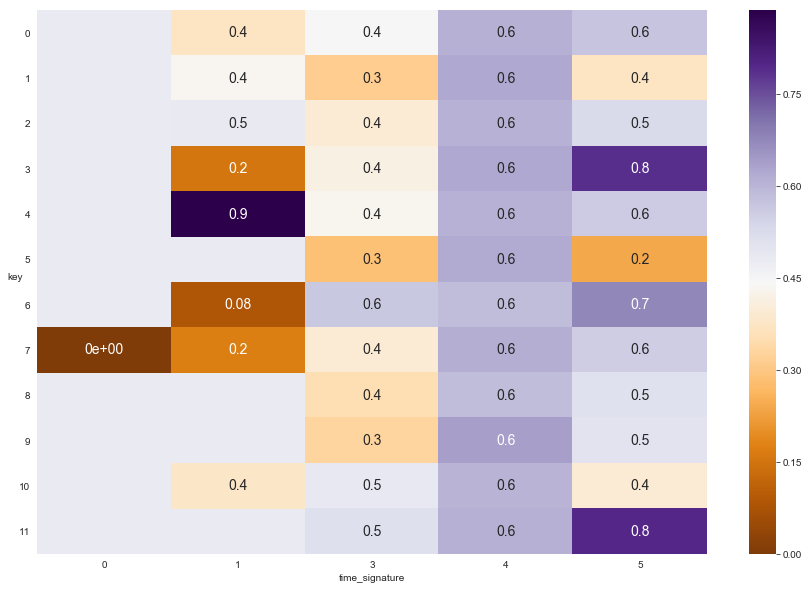

In [68]:
sns.set_context({"figure.figsize": (15, 10)})
ax = sns.heatmap(songdata_valence, cmap= 'PuOr',annot= True, fmt='0.1', annot_kws={'fontsize':14})
plt.title('')
plt.yticks(rotation = 0)
plt.ylabel('key').set_rotation(0)

plt.show()

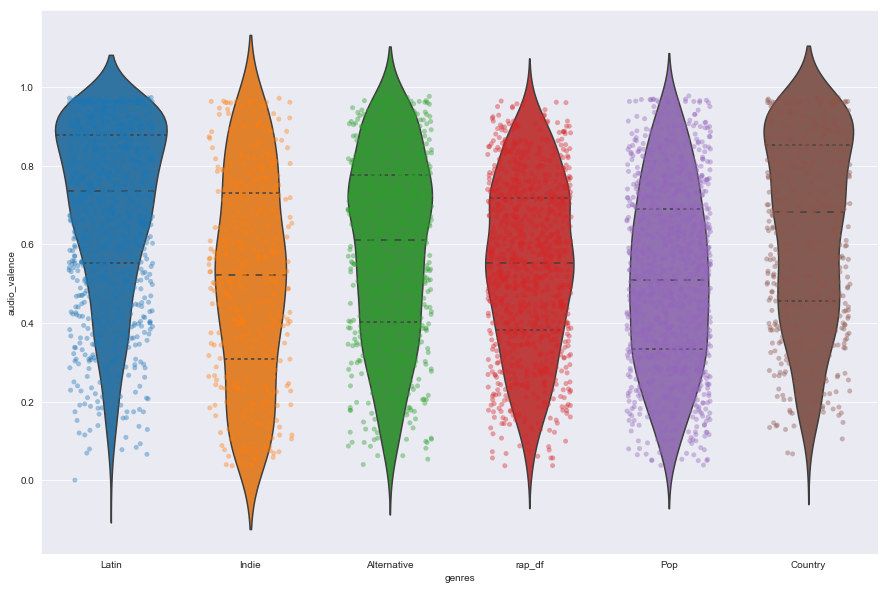

In [87]:

sns.set_style('darkgrid')

my_plot = sns.violinplot(x='genres', y='audio_valence', data=new_songs_df, inner="quartile",alpha=.1)
my_plot = sns.stripplot(x='genres', y='audio_valence', data=new_songs_df, jitter=0.3,alpha=.4)
plt.show()



In [90]:
new_songs_df

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,artist_name,album_names,playlist,genres
song_name,,,,,,,,,,,,,,,,,,
MIA (feat. Drake),94,210367,0.01430,0.818,0.540,0.000512,6,0.0990,-6.350,0,0.0544,97.064,4,0.174,Bad Bunny,MIA (feat. Drake),100% LatinX,Latin
"Taki Taki (with Selena Gomez, Ozuna & Cardi B)",98,212500,0.15300,0.841,0.798,0.000003,1,0.0618,-4.206,0,0.2290,95.948,4,0.591,DJ Snake,"Taki Taki (with Selena Gomez, Ozuna & Cardi B)",100% LatinX,Latin
White Boi,59,185282,0.09830,0.830,0.497,0.000000,1,0.0906,-6.940,1,0.0520,127.965,4,0.634,Dillon Francis,WUT WUT,100% LatinX,Latin
Just Wanna Love You (feat. J. Balvin),73,199230,0.05570,0.687,0.766,0.001070,11,0.1460,-6.080,1,0.0540,94.973,4,0.303,Cris Cab,Just Wanna Love You (feat. J. Balvin),100% LatinX,Latin
Beautiful (feat. Camila Cabello),94,180000,0.34600,0.638,0.717,0.000000,2,0.1050,-4.722,1,0.0337,100.027,4,0.249,Bazzi,Beautiful (feat. Camila Cabello),100% LatinX,Latin
Celoso,87,179693,0.35200,0.746,0.703,0.000000,4,0.3310,-4.179,0,0.1070,166.043,4,0.667,Lele Pons,Celoso,100% LatinX,Latin
Good Vibes,73,235720,0.03480,0.823,0.630,0.000007,7,0.0964,-3.932,1,0.0797,100.040,4,0.184,Fuego,Good Vibes,100% LatinX,Latin
Real Friends,85,223583,0.23500,0.701,0.512,0.000005,0,0.1350,-6.869,0,0.0969,91.947,4,0.663,Camila Cabello,Real Friends,100% LatinX,Latin
Pa La Calle,61,243487,0.11700,0.695,0.884,0.000000,0,0.1040,-6.279,1,0.1310,74.992,4,0.854,COASTCITY,Pa La Calle,100% LatinX,Latin


In [ ]:
# Libraries


# The dataset is provided in the gapminder library
library(gapminder)
data <- gapminder %>% filter(year=="2007") %>% dplyr::select(-year)

# Show a bubbleplot
data %>%
  mutate(pop=pop/1000000) %>%
  arrange(desc(pop)) %>%
  mutate(country = factor(country, country)) %>%
  ggplot( aes(x=gdpPercap, y=lifeExp, size = pop, color = continent)) +
    geom_point(alpha=0.7) +
    scale_size(range = c(1.4, 19), name="Population (M)") +
    scale_color_viridis(discrete=TRUE, guide=FALSE) +
    theme_ipsum() +
    theme(legend.position="bottom")

/Users/golnazabrishami/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Text(0, 0.5, 'audio_valence')

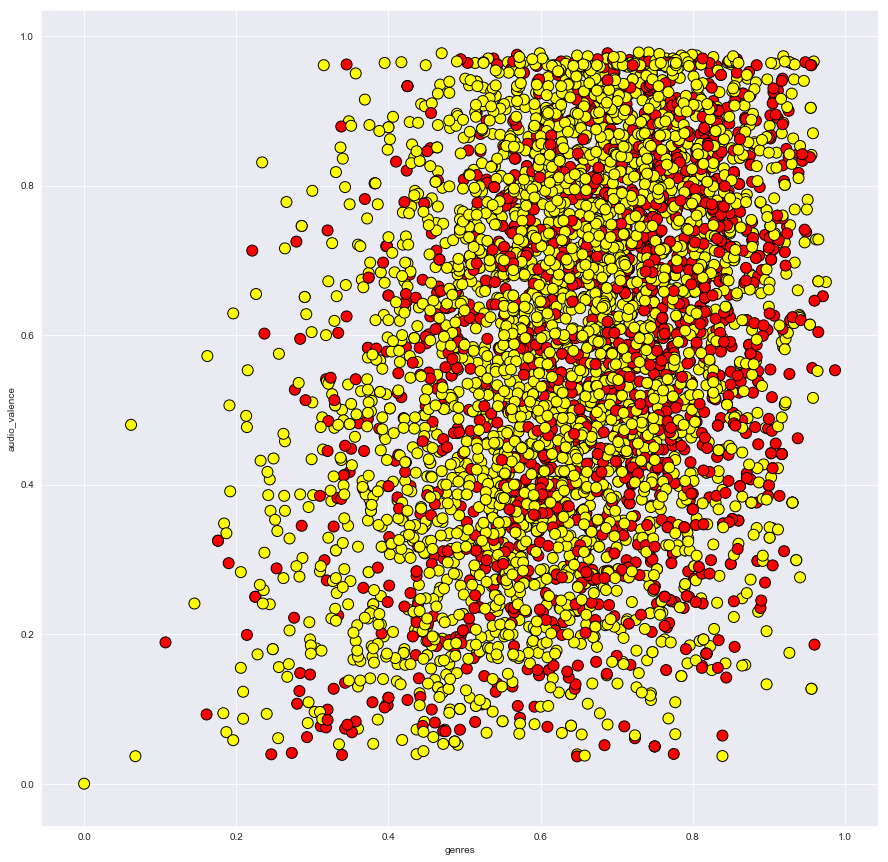

In [106]:
fig = plt.figure(figsize=(15,15))


colormap = np.array(['red', 'yellow', 'blue', 'green','violet', 'black'])
 
plt.scatter( new_songs_df.danceability, new_songs_df.audio_valence,
            c = colormap[new_songs_df.audio_mode], edgecolor = 'black', s = 120)
#plt.title('Loans:\nLoan 1 - Yellow\nLoan 2 - Red\nLoan 3 - Blue\nLoan 4 - green')
ax = fig.add_subplot(111)
ax.set_xlabel('genres')
ax.set_ylabel('audio_valence')